In [1]:
import pandas as pd

# 데이터 확인

In [2]:
시군구=pd.read_excel("./시군구종합데이터.xlsx")
행정동=pd.read_excel("./행정동단위통합데이터.xlsx")

In [3]:
녹지면적=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\추가데이터\행정동별 녹지면적.csv")

In [4]:
행정동=pd.merge(행정동,녹지면적,left_on="ADM_NM",right_on="ADM_NM")

In [5]:
행정동

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),...,펌프(합산),노후건물수,월_평균_소득_금액,지출_총금액,경찰,소방서,병원,침수횟수,GREEN_AREA_x,GREEN_AREA_y
0,0,0,0,송파구,가락1동,0.654167,1,0,3.812500,542.994437,...,500,14,4973588,5445589750,0,1,6,2,39.607754,39.607754
1,1,1,2,송파구,가락2동,0.842105,0,0,7.125000,1074.589206,...,5800,494,3910198,6054228000,0,0,37,11,52.844042,52.844042
2,2,2,3,송파구,가락본동,0.680000,0,0,10.785714,2056.158356,...,5800,657,3521561,8160591000,1,0,86,15,91.714215,91.714215
3,3,3,4,구로구,가리봉동,0.688073,0,0,9.666667,1184.743571,...,1550,910,2336331,1087078000,1,0,12,19,5.368919,5.368919
4,4,4,5,금천구,가산동,0.610245,1,0,8.772727,468.909180,...,1590,788,2567594,36128649250,1,0,65,56,4.972897,4.972897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,395,815,용산구,효창동,0.980769,1,0,12.666667,3363.536779,...,3100,419,3523201,974093250,0,0,12,0,136.136473,136.136473
396,396,396,817,용산구,후암동,1.000000,1,0,39.625000,346.532474,...,1400,1177,3013677,2002563750,1,1,15,0,283.456489,283.456489
397,397,397,819,동대문구,휘경1동,0.405797,1,0,5.800000,754.989114,...,2280,1200,2722774,3357385250,0,0,28,0,15.093137,15.093137
398,398,398,821,동대문구,휘경2동,0.300578,1,1,5.583333,640.702435,...,2280,887,3071586,2217352000,1,1,8,0,108.279326,108.279326


In [6]:
행정동인구=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\decisiontree\서울시_행정동별_인구밀도_2023.csv")

In [7]:
행정동=pd.merge(행정동,행정동인구[["행정동","계 (명)"]].rename(columns={"행정동":"ADM_NM"})
         ,left_on="ADM_NM",right_on="ADM_NM",how='left').drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','GREEN_AREA_x'],axis=1)

In [8]:
행정동

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),1분위소득가구비율(%),2분위소득가구비율(%),...,펌프(합산),노후건물수,월_평균_소득_금액,지출_총금액,경찰,소방서,병원,침수횟수,GREEN_AREA_y,계 (명)
0,송파구,가락1동,0.654167,1,0,3.812500,542.994437,20605.22388,6.976744,10.697674,...,500,14,4973588,5445589750,0,1,6,2,39.607754,27611
1,송파구,가락2동,0.842105,0,0,7.125000,1074.589206,32888.54167,12.245310,14.877950,...,5800,494,3910198,6054228000,0,0,37,11,52.844042,31573
2,송파구,가락본동,0.680000,0,0,10.785714,2056.158356,22821.23894,12.462591,17.507482,...,5800,657,3521561,8160591000,1,0,86,15,91.714215,25788
3,구로구,가리봉동,0.688073,0,0,9.666667,1184.743571,31655.00000,39.355304,28.337744,...,1550,910,2336331,1087078000,1,0,12,19,5.368919,12662
4,금천구,가산동,0.610245,1,0,8.772727,468.909180,10567.85714,22.982635,26.710930,...,1590,788,2567594,36128649250,1,0,65,56,4.972897,26631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,용산구,효창동,0.980769,1,0,12.666667,3363.536779,24777.27273,14.144849,14.960898,...,3100,419,3523201,974093250,0,0,12,0,136.136473,10902
396,용산구,후암동,1.000000,1,0,39.625000,346.532474,19465.11628,21.626764,19.248454,...,1400,1177,3013677,2002563750,1,1,15,0,283.456489,16740
397,동대문구,휘경1동,0.405797,1,0,5.800000,754.989114,25936.50794,32.527147,26.176374,...,2280,1200,2722774,3357385250,0,0,28,0,15.093137,16340
398,동대문구,휘경2동,0.300578,1,1,5.583333,640.702435,24180.95238,26.526171,22.254037,...,2280,887,3071586,2217352000,1,1,8,0,108.279326,25390


In [9]:
행정동["월_평균_지출_금액"]=행정동["지출_총금액"]/행정동['계 (명)']

In [10]:
행정동.rename(columns={"GREEN_AREA_y":"녹지면적"},inplace=True)

In [11]:
행정동["녹지면적"]=행정동["녹지면적"]/1000

In [75]:
행정동

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),1분위소득가구비율(%),2분위소득가구비율(%),...,월_평균_소득_금액,지출_총금액,경찰,소방서,병원,침수횟수,녹지면적,계 (명),월_평균_지출_금액,침수여부
0,송파구,가락1동,0.654167,1,0,3.812500,542.994437,20605.22388,6.976744,10.697674,...,4973588,5445589750,0,1,6,2,0.039608,27611,1.972254e+05,1
1,송파구,가락2동,0.842105,0,0,7.125000,1074.589206,32888.54167,12.245310,14.877950,...,3910198,6054228000,0,0,37,11,0.052844,31573,1.917533e+05,1
2,송파구,가락본동,0.680000,0,0,10.785714,2056.158356,22821.23894,12.462591,17.507482,...,3521561,8160591000,1,0,86,15,0.091714,25788,3.164492e+05,1
3,구로구,가리봉동,0.688073,0,0,9.666667,1184.743571,31655.00000,39.355304,28.337744,...,2336331,1087078000,1,0,12,19,0.005369,12662,8.585358e+04,1
4,금천구,가산동,0.610245,1,0,8.772727,468.909180,10567.85714,22.982635,26.710930,...,2567594,36128649250,1,0,65,56,0.004973,26631,1.356639e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,용산구,효창동,0.980769,1,0,12.666667,3363.536779,24777.27273,14.144849,14.960898,...,3523201,974093250,0,0,12,0,0.136136,10902,8.934996e+04,0
396,용산구,후암동,1.000000,1,0,39.625000,346.532474,19465.11628,21.626764,19.248454,...,3013677,2002563750,1,1,15,0,0.283456,16740,1.196275e+05,0
397,동대문구,휘경1동,0.405797,1,0,5.800000,754.989114,25936.50794,32.527147,26.176374,...,2722774,3357385250,0,0,28,0,0.015093,16340,2.054703e+05,0
398,동대문구,휘경2동,0.300578,1,1,5.583333,640.702435,24180.95238,26.526171,22.254037,...,3071586,2217352000,1,1,8,0,0.108279,25390,8.733171e+04,0


# 침수여부 확인
- 1. 의사결정나무
- 2. Logistic Regression

## 데이터 사용방법
- 1. 시군구 데이터 X
- 2. 시군구 데이터 O

### 1. 시군구 데이터 X

In [61]:
#침수여부
행정동["침수여부"]=0
행정동.loc[행정동["침수횟수"]>0,"침수여부"]=1
target="침수여부"
행정동feature=['배수등급양호비율', '제방', '수문', '평균경사도(%)',
       '하천까지의거리(중심)', '인구밀도(명/km²)', '1분위소득가구비율(%)', '2분위소득가구비율(%)',
       '3분위소득가구비율(%)', '4분위소득가구비율(%)', '5분위소득가구비율(%)', '빗물펌프장까지의거리(m)',
       '토출량(㎥/분)', '펌프(합산)', '노후건물수', '월_평균_소득_금액', '지출_총금액', '경찰', '소방서',
       '병원',"녹지면적","계 (명)"]

#### 1-1. 의사결정나무

#### 1-2. Logistic Regression

In [44]:
import statsmodels.api as sm # Logistic Regression
import sklearn.preprocessing as skpre # Preprocessing

In [45]:
import matplotlib.pyplot as plt # 시각화 해야함
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"

In [46]:
# # Pairplot
# plt.figure()
# sb.pairplot(행정동[feature])
# plt.show()
# plt.close()

In [67]:
# 박스플롯으로 확인하기 위해 스케일링
minmax=skpre.MinMaxScaler()
minmax.fit(X=행정동[행정동feature])

MinMaxScaler()

In [68]:
# minmax scale
pre_행정동=행정동.copy()
pre_행정동[행정동feature]=pd.DataFrame(minmax.transform(X=행정동[행정동feature]),columns=행정동feature)

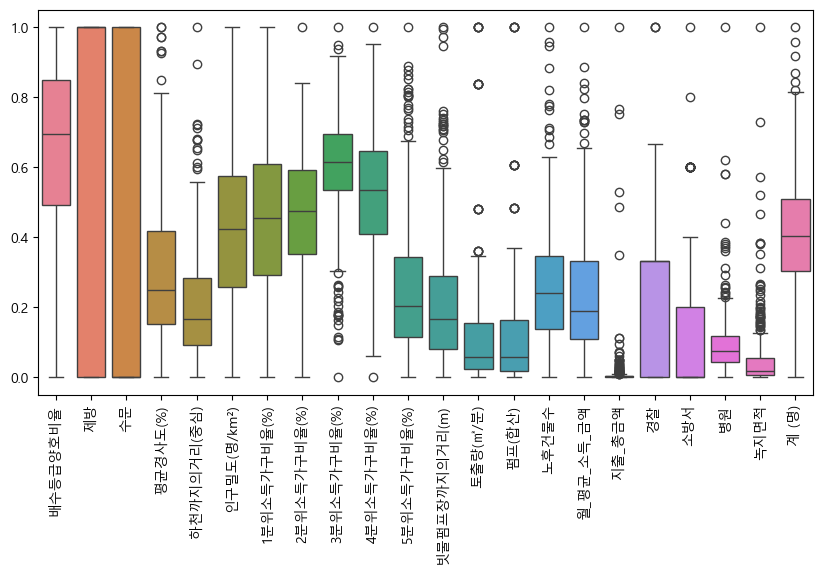

In [69]:
# 박스플롯
feature_num=len(행정동feature)
plt.figure(figsize=(10,5))
sb.boxplot(pre_행정동[행정동feature])
plt.xticks(rotation=90)
plt.show()

In [50]:
# 후진제거법
def backward_elimination(X, y, significance_level=0.1):
    included = list(X.columns)
    
    while True:
        changed = False
        model = sm.Logit(y,X[included]).fit()
        p_values = model.pvalues
        worst_feature = None
        
        for feature in included:
            if p_values[feature] > significance_level:
                if worst_feature is None or p_values[feature] > p_values[worst_feature]:
                    worst_feature = feature
        
        if worst_feature is not None:
            included.remove(worst_feature)
            changed = True
        
        if not changed:
            break
    
    model = sm.Logit(y,X[included]).fit()
    return model

In [51]:
test=backward_elimination(y=pre_행정동[target],X=pre_행정동[feature],significance_level=0.1)

Optimization terminated successfully.
         Current function value: 0.572152
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572500
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572944
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573869
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574714
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575457
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576513
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577482
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578515
  

In [52]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                 0.09984
Time:                        11:50:55   Log-Likelihood:                -231.41
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 7.396e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
배수등급양호비율        0.8275      0.402      2.061      0.039       0.041       1.614
하천까지의거리(중심)    -2.2682      0.711     -3.189      0.001      -3.662      -0.874
노후건물수           3.1929      0.714      4.474      0.000       1.794       4.592
월_평균_소득_금액     -1.4630      0.628     -2.329      0.020      -2.694      -0.232
소방서             1.7181      0.828      2.075      0.038       0.095       3.341
병원              4.1512      1.751      2.371      0.018       0.720       7.583
===============================================================================
"""

In [53]:
# 상수항 추가하지 않음
logic_model_nonconst=sm.Logit(endog=pre_행정동[target],exog=pre_행정동[feature]).fit()
logic_model_nonconst.summary()

Optimization terminated successfully.
         Current function value: 0.572152
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           14
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1097
Time:                        11:51:01   Log-Likelihood:                -228.86
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 4.924e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
배수등급양호비율          0.8720      0.508      1.718      0.086      -0.123       1.867
평균경사도(%)         -0.6493      0.730     -0.889      0.374      -2.081       0.782
하천까지의거리(중심)      -2.3243      0.785     -2.960      0.003      -3.863      -0.785
인구밀도(명/km²)      -0.1634      0.654     -0.250      0.803      -1.445       1.118
빗물펌프장까지의거리(m)     0.9096      0.749      1.215      0.225      -0.558       2.377
토출량(㎥/분)          3.7243      3.962      0.940      0.347      -4.041      11.490
펌프(합산)           -3.4785      4.152     -0.838      0.402     -11.616       4.659
노후건물수             3.0689      0.785      3.908      0.000       1.530       4.608
월_평균_소득_금액       -1.4164      0.747     -1.895      0.058      -2.881       0.048
지출_총금액           -1.0972      1.542     -0.711      0.477      -4.120       1.926
경찰               -0.3923      0.618     -0.634      0.526      -1.605       0.820
소방서               1.7358      0.857      2.025      0.043       0.055       3.416
병원                4.2054      1.864      2.256      0.024       0.552       7.859
녹지면적             -1.5869      1.474     -1.077      0.282      -4.475       1.301
계 (명)             0.4389      0.837      0.525      0.600      -1.201       2.079
=================================================================================
"""

In [54]:
# 상수항 추가함
logic_model_const=sm.Logit(endog=행정동[target],exog=sm.add_constant(행정동[feature])).fit()
logic_model_const.summary()

Optimization terminated successfully.
         Current function value: 0.571252
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                           15
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1111
Time:                        11:51:02   Log-Likelihood:                -228.50
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 7.762e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7600      0.898     -0.846      0.398      -2.521       1.001
배수등급양호비율          1.0034      0.531      1.891      0.059      -0.036       2.043
평균경사도(%)         -0.0154      0.018     -0.858      0.391      -0.051       0.020
하천까지의거리(중심)      -0.0005      0.000     -2.909      0.004      -0.001      -0.000
인구밀도(명/km²)    1.613e-06   1.31e-05      0.123      0.902    -2.4e-05    2.72e-05
빗물펌프장까지의거리(m)     0.0001      0.000      1.369      0.171   -5.91e-05       0.000
토출량(㎥/분)          0.0004      0.000      1.060      0.289      -0.000       0.001
펌프(합산)           -0.0001      0.000     -0.946      0.344      -0.000       0.000
노후건물수             0.0012      0.000      3.528      0.000       0.001       0.002
월_평균_소득_금액     -8.42e-08   1.61e-07     -0.522      0.602      -4e-07    2.32e-07
지출_총금액        -6.589e-13   9.49e-13     -0.695      0.487   -2.52e-12     1.2e-12
경찰               -0.1182      0.207     -0.571      0.568      -0.524       0.287
소방서               0.3561      0.172      2.073      0.038       0.019       0.693
병원                0.0098      0.005      2.113      0.035       0.001       0.019
녹지면적             -0.3850      0.393     -0.980      0.327      -1.155       0.385
계 (명)          8.631e-06   1.52e-05      0.567      0.571   -2.12e-05    3.85e-05
=================================================================================
"""

### 2. 시군구 데이터 포함

In [56]:
시군구=pd.read_excel("./시군구종합데이터.xlsx")

In [59]:
통합=pd.merge(행정동,시군구.rename(columns={"동별(2)":"GU_NAME"}),left_on="GU_NAME",right_on="GU_NAME")

In [60]:
통합

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),1분위소득가구비율(%),2분위소득가구비율(%),...,추정면적당시우량(연간),맨홀수,토실토구수,면적 (k㎡),측구(km),우수관거(km),면적당맨홀수,면적당토실토구수,면적당측구(%),면적당우수관거(%)
0,송파구,가락1동,0.654167,1,0,3.812500,542.994437,20605.223880,6.976744,10.697674,...,0.312399,14357,172,33.88,0.011036,0.097237,423.760331,5.076741,0.032574,0.287004
1,송파구,가락2동,0.842105,0,0,7.125000,1074.589206,32888.541670,12.245310,14.877950,...,0.312399,14357,172,33.88,0.011036,0.097237,423.760331,5.076741,0.032574,0.287004
2,송파구,가락본동,0.680000,0,0,10.785714,2056.158356,22821.238940,12.462591,17.507482,...,0.312399,14357,172,33.88,0.011036,0.097237,423.760331,5.076741,0.032574,0.287004
3,송파구,거여1동,0.542857,1,1,8.400000,575.563829,24039.215690,20.749884,21.495109,...,0.312399,14357,172,33.88,0.011036,0.097237,423.760331,5.076741,0.032574,0.287004
4,송파구,거여2동,0.641026,0,0,5.500000,904.154512,44803.773580,21.517846,21.569385,...,0.312399,14357,172,33.88,0.011036,0.097237,423.760331,5.076741,0.032574,0.287004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,강북구,수유1동,0.684729,0,0,29.250000,889.736212,12270.059880,28.829071,25.720054,...,0.362476,11163,155,23.60,0.000522,0.000215,473.008475,6.567797,0.002212,0.000911
396,강북구,수유2동,0.619718,1,1,5.500000,306.742839,36817.543860,24.633431,24.116743,...,0.362476,11163,155,23.60,0.000522,0.000215,473.008475,6.567797,0.002212,0.000911
397,강북구,수유3동,0.522876,1,0,5.857143,545.265482,33169.444440,31.687146,27.386578,...,0.362476,11163,155,23.60,0.000522,0.000215,473.008475,6.567797,0.002212,0.000911
398,강북구,우이동,0.931128,1,1,24.583333,640.979655,1976.459144,24.626866,23.550517,...,0.362476,11163,155,23.60,0.000522,0.000215,473.008475,6.567797,0.002212,0.000911


In [66]:
시군구feature=['도로율', '노인_per', '장애인_per', '기초생활수급자_per',
       '기초생활수급자+65세이상_per', '추정면적당시우량(연간)','면적당맨홀수', '면적당토실토구수', '면적당측구(%)', '면적당우수관거(%)']

#### 2-1. 의사결정나무

#### 2-2. Logistic Regression

In [70]:
# 박스플롯으로 확인하기 위해 스케일링
minmax=skpre.MinMaxScaler()
minmax.fit(X=통합[행정동feature+시군구feature])

MinMaxScaler()

In [72]:
pre_통합=통합.copy()
pre_통합[행정동feature+시군구feature]=minmax.transform(통합[행정동feature+시군구feature])

In [73]:
test=backward_elimination(y=pre_통합[target]
                          ,X=pre_통합[행정동feature+시군구feature],significance_level=0.1)

Optimization terminated successfully.
         Current function value: 0.496884
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496924
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497971
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498440
  

In [74]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1857
Time:                        12:02:43   Log-Likelihood:                -209.32
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 9.149e-18
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
노후건물수                 4.4104      0.899      4.904      0.000       2.648       6.173
소방서                   1.6487      0.885      1.863      0.063      -0.086       3.384
계 (명)                 1.6068      0.713      2.254      0.024       0.210       3.004
노인_per                7.0805      1.111      6.375      0.000       4.903       9.257
기초생활수급자+65세이상_per    -4.9522      0.815     -6.075      0.000      -6.550      -3.354
면적당맨홀수               -2.4294      0.582     -4.171      0.000      -3.571      -1.288
면적당토실토구수             -1.7190      0.585     -2.938      0.003      -2.866      -0.572
면적당우수관거(%)            0.8375      0.461      1.816      0.069      -0.066       1.741
=====================================================================================
"""